In [1]:
import numpy as np

#Input array
X = np.array([[1, 0, 1, 0], [1 ,0 ,1 ,1 ],[ 0 , 1 , 0 , 1 ]])

#Output
y = np.array([[1], [1], [0]])

In [2]:
#Sigmoid Function
def sigmoid(x): 
    return  1/(1+np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x): 
    return x*(1-x)

In [3]:
#Variable initialization
epoch = 5000 #Setting training iterations
#epoch = 3
lr = 0.1 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set 
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

trace_on = False

In [4]:
#weight and bias initialization
wh = np.random.uniform( size = ( inputlayer_neurons , hiddenlayer_neurons ) ) 
bh = np.random.uniform( size = ( 1 , hiddenlayer_neurons ) ) 
wout = np.random.uniform( size = ( hiddenlayer_neurons , output_neurons ) ) 
bout = np.random.uniform( size = ( 1 , output_neurons ) )

In [5]:
print(f"wh={wh.shape}\n{wh}\n")
print(f"bh={bh.shape}\n{bh}\n")
print(f"wout={wout.shape}\n{wout}\n")
print(f"bout={bout.shape}\n{bout}\n")

wh=(4, 3)
[[0.5746657  0.54318977 0.49746351]
 [0.20261826 0.29991002 0.84383694]
 [0.59708958 0.46361414 0.57072398]
 [0.01439444 0.94735694 0.08918554]]

bh=(1, 3)
[[0.03699233 0.85255229 0.61544565]]

wout=(3, 1)
[[0.48012344]
 [0.14446833]
 [0.16555715]]

bout=(1, 1)
[[0.16128902]]



# 作業 
* 請參閱範例中的 hidden Layer 寫法, 完成 output Layer 的程式

In [6]:
results = []

for i in  range ( epoch ) :
    #Forward Propogation
    hidden_layer_input1 = np.dot(X, wh) 
    hidden_layer_input = hidden_layer_input1 + bh
    hidden_layer_activations = sigmoid( hidden_layer_input ) 

    output_layer_input1 = np.dot(hidden_layer_activations, wout) 
    output_layer_input = output_layer_input1 + bout
    output = sigmoid( output_layer_input ) 
    
    results.append((i+1, output))
    
    if trace_on:
        print(f"run={i} {'*'*20}")
        print(f"wh={wh.shape}\n{wh}\n")
        print(f"bh={bh.shape}\n{bh}\n")
        print(f"wout={wout.shape}\n{wout}\n")
        print(f"bout={bout.shape}\n{bout}\n")
    
    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hidden_layer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr    
    
print(f"final result {'='*20}")
print(f"target output:\n{y}") 
print("output of Forward Propogation:\n{}" .format(output)) 
print("wout,bout of Backpropagation:\n{},\n{}" .format(wout, bout ))

final result ====================
target output:
[[1]
 [1]
 [0]]
output of Forward Propogation:
[[0.97131094]
 [0.9602634 ]
 [0.05299598]]
wout,bout of Backpropagation:
[[ 6.37226597]
 [-1.11930064]
 [-0.89433552]],
[[-1.23269361]]


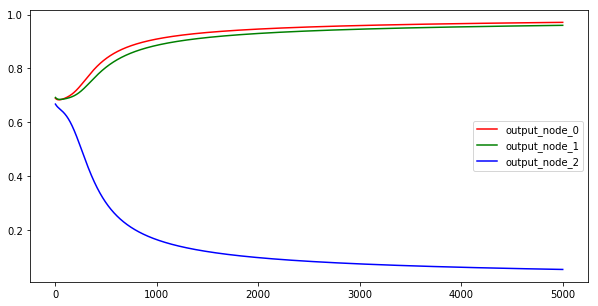

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(index, output) = zip(*results)
(x0, x1, x2) = zip(*output)

plt.figure(figsize=(10,5))
plt.plot(index, x0, color='r', label='output_node_0')
plt.plot(index, x1, color='g', label='output_node_1')
plt.plot(index, x2, color='b', label='output_node_2')
plt.legend(loc='best')

plt.show()

ref:
[Backpropagation](https://gist.github.com/CamilleMo/273158a7d1dac1d70f181cb48594d4f8)